In [1]:
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import arabic_reshaper
import re
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from itertools import islice

%matplotlib inline

## Table of Contents:
- [1- Introduction](#1--Introduction:)
- [2- Initial Data cleaning](#2--Initial-Data-cleaning)
    - [2.1- Removing ads and spam Tweets ](#2.1-Removing-ads-and-spam-Tweets)
- [3 - Applying The Pre-trained Model](#3--Applying-The-Pre-trained-Model)
- [4- Data Cleaning](#4--Data-Cleaning)
- [5- Sentiment analysis visualization](#5--Sentiment-analysis-visualization)
    - [5.1- Visualization by moving average](#5.1--Visualization-by-moving-average)
    - [5.2- Visualization by grouping match minutes](#5.2--Visualization-by-grouping-match-minutes)
    - [5.3- Visualization by grouping data by 30 seconds](#5.3--Visualization-by-grouping-data-by-30-seconds)
- [6- Word cloud visualiazations](#6--Word-cloud-visualizations)
    - [6.1- Messi goal word cloud](#6.1--Messi-goal-word-cloud)
    - [6.2- Saleh S. goal word cloud](#6.2--Saleh-S.-goal-word-cloud)
    - [6.3- Salem D. goal word cloud](#6.3--Salem-D.-goal-word-cloud)
- [7- Conclusion](#7--Conclusion)

## 1- Introduction:
>This project aims to analyze Saudi Arabia's Tweets during their contributions to Qatar World Cup 2022 matches. I will use a pre-trained sentiment analysis model from <a href=https://huggingface.co/CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment> Camel-Lab </a> That analyzes the tweets as positive or negative with a score range from -1 to +1.
<br>
>Also, we will use different data analysis techniques to clean-analyze-visualize the data in different ways and determine the best plot that reflects how actually Saudi fans reacted at the match time using their tweets.

In [2]:
#Loading the model.
sa = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')

In [507]:
df = pd.read_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\1st_match.csv")
#df2 = pd.read_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\2nd_match.csv")
#df3 = pd.read_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\3rd_match.csv")

## 2- Initial Data cleaning

### 2.1 Removing ads and spam Tweets 

In [43]:
#Removing the most occuring-spammy words.
df = df[~df.Tweet.str.contains('massage')]
df = df[~df.Tweet.str.contains('Massage')]
df = df[~df.Tweet.str.contains('عرض خاص')]
df = df[~df.Tweet.str.contains('تدليك')]
df = df[~df.Tweet.str.contains('مساج')]
df = df[~df.Tweet.str.contains('شركة تسريبات')]
df = df[~df.Tweet.str.contains('نقل عفش')]
df = df[~df.Tweet.str.contains('كود خصم')]
df = df[~df.Tweet.str.contains('احصل')]
df = df[~df.Tweet.str.contains('تنظيف')]
df = df[~df.Tweet.str.contains('متابعين')]
df = df[~df.Tweet.str.contains('لايكات')]
df = df[~df.Tweet.str.contains('رتويت')]
df = df[~df.Tweet.str.contains('مسابقات')]
df = df[~df.Tweet.str.contains('مشتركين')]
df = df[~df.Tweet.str.contains('سناب')]
df = df[~df.Tweet.str.contains('كوبون')]
df = df[~df.Tweet.str.contains('ﺧٕٓصٍمٍ•ﻜٕوِدٓ•')]
df = df[~df.Tweet.str.contains('خ̷ص̸م̴')]
df = df[~df.Tweet.str.contains('ك̷و̷د̶')]
df = df[~df.Tweet.str.contains('ﻜٕوِبون')]
df = df[~df.Tweet.str.contains('تواصل معنا')]
df = df[~df.Tweet.str.contains('شركة مكافحة')]
df = df[~df.Tweet.str.contains('مكافحة حشرات')]
df = df[~df.Tweet.str.contains('سطحة')]
df = df[~df.Tweet.str.contains('سطحه')]
df = df[~df.Tweet.str.contains('نقل العفش')]
df = df[~df.Tweet.str.contains('شركة بالرياض')]
df = df[~df.Tweet.str.contains('شركة الرياض')]
df = df[~df.Tweet.str.contains('دهان بالرياض')]
df = df[~df.Tweet.str.contains('بويه بالرياض')]
df = df[~df.Tweet.str.contains('مكافحة بالرياض')]
df = df[~df.Tweet.str.contains('مقاول بالرياض')]
df = df[~df.Tweet.str.contains('صبابين بالرياض')]
df = df[~df.Tweet.str.contains('صبابين الرياض')]
df = df[~df.Tweet.str.contains('جبس الرياض')]
df = df[~df.Tweet.str.contains('جبس بالرياض')]
df = df[~df.Tweet.str.contains('搞')]
df = df[~df.Tweet.str.contains('要')]
df = df[~df.Tweet.str.contains('個')]

In [21]:
df = df[~df['Tweet'].duplicated(keep=False)]

In [55]:
df[df['User_followers'] < 10].Userame

14         @qu0tes4tiktok
15         @qu0tes4tiktok
24         @qu0tes4tiktok
28             @ysrslymn4
41         @BDZcKyqnGiTSR
               ...       
82729            @7iijll0
82731        @imtinanhrbi
82800        @aannaa14333
82875    @Ibrahem71529419
82916            @mbs_540
Name: Userame, Length: 24008, dtype: object

In [56]:
dff = pd.DataFrame(df[df['User_followers'] < 10].Userame, columns=['Userame'])

,Userame
14,@qu0tes4tiktok
15,@qu0tes4tiktok
24,@qu0tes4tiktok
28,@ysrslymn4
41,@BDZcKyqnGiTSR
...,...
82729,@7iijll0
82731,@imtinanhrbi
82800,@aannaa14333
82875,@Ibrahem71529419


In [58]:
#Save a black-list of fake accounts
dff.to_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\spam_accounts_black_list.csv", index=False)

In [8]:
#Random word that some fake account spam.
df[df.Tweet.str.contains('غلبتني فحلف')]

,user_ID,Userame,User_followers,User_following,User_total_favourites,User_total_tweets,Tweet_time,Tweet,Place,Place_type,Coordinates,Device,Verified_account
16991,1.597868e+18,@asridhion,0.0,31.0,21.0,15.0,2022-11-30 08:21:13+00:00,غلبتني فحلف,"Riyadh, Kingdom of Saudi Arabia",admin,"[[[42.010156, 19.471337], [42.010156, 27.57481...",Twitter for Android,False
20768,1.597884e+18,@rahabnges40,0.0,18.0,0.0,4.0,2022-11-30 09:22:20+00:00,غلبتني فحلف,"Riyadh, Kingdom of Saudi Arabia",admin,"[[[42.010156, 19.471337], [42.010156, 27.57481...",Twitter for Android,False


In [55]:
#Take variables of intrest only
df = df[['Userame','Tweet_time','Tweet']]

In [61]:
df = df[['Userame','Tweet_time','Tweet']]

In [64]:
df['res'] = ''
df

C:\Users\Moaya\AppData\Local\Temp/ipykernel_12000/1799095948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['res'] = ''


,Userame,Tweet_time,Tweet,res
0,@xnv3_,2022-11-30 00:00:02+00:00,@Hamaal_7 ميمي ميمي هاتو المكسيكي,
1,@Daliaam95,2022-11-30 00:00:13+00:00,درس اتعلمتوا واترسخ خلاص في مخي لباقي عمري اخت...,
4,@sw_aziiz,2022-11-30 00:00:18+00:00,أنا ماهو أنا.,
5,@_catwo,2022-11-30 00:00:21+00:00,ماتوقعت إن العدسات تحلّي العين لهدرجة🥹♥️,
6,@iamhga7,2022-11-30 00:00:22+00:00,@_lonelymon اتعبكككك كشخات ترا ذا اخيس طقم عندي,
...,...,...,...,...
82911,@ABinShoweil,2022-11-30 23:59:49+00:00,ليلة طرب مع عبادي🥹💙🎶 https://t.co/PP2IaQuw4q,
82912,@Fahd333777,2022-11-30 23:59:50+00:00,@MaryB5aty9wj نور على نور ..😍,
82915,@Rkkr145,2022-11-30 23:59:52+00:00,وتوته يا توته انتهت الحتوته,
82917,@Assi02893151,2022-11-30 23:59:58+00:00,@mmzaeey اللهم امين يارب,


## 3- Applying The Pre trained Model

In [65]:
#Applying the pre-trained sentiment analysis model for our data.
for i in range(df.shape[0]):
    df['res'].iloc[i] = sa(df['Tweet'].iloc[i])

C:\Users\Moaya\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
df.to_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\1st_match_predicted.csv", encoding='utf-8-sig', index=False)
#df2.to_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\2nd_match_predicted.csv", encoding='utf-8-sig', index=False)

## 4- Data Cleaning

In [39]:
df1 = pd.read_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\1st_match_predicted.csv")
#df2 = pd.read_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\2nd_match_predicted.csv")
#df3 = pd.read_csv(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\3rd_match_predicted.csv")

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58181 entries, 0 to 58180
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Userame     58181 non-null  object
 1   Tweet_time  58181 non-null  object
 2   Tweet       58181 non-null  object
 3   res         58181 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35038 entries, 0 to 35037
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Userame     35038 non-null  object
 1   Tweet_time  35038 non-null  object
 2   Tweet       35038 non-null  object
 3   res         35038 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43938 entries, 0 to 43937
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Userame     43938 non-null  object
 1   Tweet_time  43938 non-null  object
 2   Tweet       43938 non-null  object
 3   res         43938 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [12]:
#Group dataframes
df = df1.append([df2, df3])

In [13]:
df.shape[0]

137157

In [16]:
(df1.shape[0] + df2.shape[0]+ df3.shape[0]) % df.shape[0] == 0

True

In [17]:
#Remove neutral results
df[df['res'].str.contains('neutral')]

,Userame,Tweet_time,Tweet,res
0,@Ewqu_,2022-11-22 08:31:35+00:00,صاحي قبل المباراة بثلاث ساعات \n\n💚🇸🇦 وطنية 🇸🇦💚,"[{'label': 'neutral', 'score': 0.7373687624931..."
1,@1ztle,2022-11-22 08:31:35+00:00,هذا وجه حارس الارجنتنين اللي يبي يشوفه احتمال ...,"[{'label': 'neutral', 'score': 0.6704737544059..."
19,@xsm15_,2022-11-22 08:32:18+00:00,الهلال ضد الارجنتين بس والله المفروض العمري موجود,"[{'label': 'neutral', 'score': 0.5456371903419..."
21,@MohannaAlman,2022-11-22 08:32:20+00:00,٩ هلاليين 🫡🇸🇦💙💚 https://t.co/BfTCuKSYlP,"[{'label': 'neutral', 'score': 0.6796045899391..."
23,@hamad13637,2022-11-22 08:32:24+00:00,@tod_tv يرجى تزويدي بطريقة إلغاء الاشتراك؟\nال...,"[{'label': 'neutral', 'score': 0.9080281257629..."
...,...,...,...,...
43922,@anmarbashnini1,2022-11-30 23:59:05+00:00,@lujain_599 @r18r__ مدل بيست😭😂,"[{'label': 'neutral', 'score': 0.8656788468360..."
43923,@BraveHe67620748,2022-11-30 23:59:06+00:00,@Alahli_fan_ @SalehBinDhafer @rdqlbe @falconn8...,"[{'label': 'neutral', 'score': 0.5624173879623..."
43932,@baan_00,2022-11-30 23:59:48+00:00,آخر كسرة خاطِر من زمن طويل ، وش رجّع هالشعُور ...,"[{'label': 'neutral', 'score': 0.5833470225334..."
43933,@ABinShoweil,2022-11-30 23:59:49+00:00,ليلة طرب مع عبادي🥹💙🎶 https://t.co/PP2IaQuw4q,"[{'label': 'neutral', 'score': 0.5385332107543..."


In [41]:
df = df[~df['res'].str.contains('neutral')]

In [19]:
df.shape[0]

107746

### Check if we have the needed data
> We need Tweets within the match and after the match by an hour, the original datasets are mixed and not really tidy, that's why we combined them. <b> (I'll take two hours after because matches not exactly two hours, overtime and etc.) </b>
<br>
<br>
> 1st match was at 11-22 1:00 PM GMT+3
<br>
<br>
> 2nd match was at 11-26 4:00 PM GMT+3
<br>
<br>
> 3rd match was at 11-30 10:00 PM GMT+3

But first change the Tweets time from GMT to GMT+3

In [45]:
df['Tweet_time'] = pd.to_datetime(df['Tweet_time']).dt.tz_convert('Asia/Kuwait')

In [21]:
df[['Tweet_time']].head()

,Tweet_time
2,2022-11-22 11:31:36+03:00
3,2022-11-22 11:31:36+03:00
4,2022-11-22 11:31:38+03:00
5,2022-11-22 11:31:39+03:00
6,2022-11-22 11:31:46+03:00


In [22]:
pd.set_option('display.max_rows', None)

In [ ]:
#First match time check
df[df['Tweet_time'].astype(str).str.contains('2022-11-22 13|2022-11-22 14|2022-11-22 15|2022-11-22 16')]

In [ ]:
#Second match time check
df[df['Tweet_time'].astype(str).str.contains('2022-11-26 16|2022-11-26 17|2022-11-26 18|2022-11-26 19')]

In [ ]:
#Third match time check
df[df['Tweet_time'].astype(str).str.contains('2022-11-30 22|2022-11-30 23|2022-12-01 00|2022-12-01 01')]

#### We have seen that in the second match we have only the last 20 mins of the match and the time after the match but for the other two matches we have everything.
>(Note): The output was cleared to improve my memory performance.

### Cleaning 'res' variable using string manipulation 

In [442]:
#Before
df[['res']].head()

,res
2,"[{'label': 'positive', 'score': 0.916225731372..."
3,"[{'label': 'positive', 'score': 0.969212055206..."
4,"[{'label': 'positive', 'score': 0.856728494167..."
5,"[{'label': 'negative', 'score': 0.703528940677..."
6,"[{'label': 'positive', 'score': 0.985169649124..."


In [46]:
def string_slicing(string):
    if('negative' in string):
        return float('-' + string.split(':')[2][1:-2])
    else:
        return float(string[32:-2])

In [47]:
df['res'] = df['res'].apply(string_slicing)

In [444]:
#After
df[['res']].head()

,res
2,0.916226
3,0.969212
4,0.856728
5,-0.703529
6,0.985170


## 5- Sentiment analysis visualization

### 5.1- Visualization by moving average
##### First visuilazation would be as a moving average only, becaues the sentiment results variation are very high.
> First, let's determine the first match time end time.

In [469]:
df[df['Tweet_time'].str.contains('11-22 15:07')].head(60)

,Userame,Tweet_time,Tweet,res
21081,@saif_sahari,2022-11-22 15:07:01+03:00,الف الف مبرووووووك ياوطني الحمدلله 💪🏻💪🏻🇸🇦\n#ال...,0.994457
21082,@realsaher_,2022-11-22 15:07:01+03:00,صفر يازففتتتت #السعوديه_الارجنتين,-0.680651
21083,@NMH_2014,2022-11-22 15:07:01+03:00,اللهم لك الحمد ، فوز كبير لمنتخبنا العظيم 🇸🇦\n...,0.994400
21084,@M7uu_,2022-11-22 15:07:01+03:00,صفرررررر يخوي,-0.567384
21085,@iiyupl,2022-11-22 15:07:01+03:00,ابكيكك ياضفعه يا سكالوني,-0.996529
21086,@Dahme_k,2022-11-22 15:07:02+03:00,صفر يا ملعون يا جزمة,-0.994631
21087,@Cindrella_98,2022-11-22 15:07:02+03:00,يقطع شكلك ياحكم صفر,-0.992541
21089,@Am_76r,2022-11-22 15:07:03+03:00,ييييلعن دددييييينك يبن اللللللززززناااااااا ال...,-0.863289
21090,@RAlsh1018,2022-11-22 15:07:03+03:00,@HeyItsHaifaa المفروض هذا تستحين تنزلينه حنا س...,-0.906119
21091,@Im3bux,2022-11-22 15:07:03+03:00,يا حكم يعني مستانس بالمباراة؟تكفى خلااهععععصص,-0.902027


From the previous output, we can see the 1st match ended excatly at <b>'2022-11-22 15:07:04+03:00'</b> and index number <b>'21095'</b>

In [48]:
sa_vs_arg = df[(df['Tweet_time'] > '2022-11-22 13:00:00+03:00') & (df['Tweet_time'] <= '2022-11-22 15:07:04+03:00')]
sa_vs_arg

,Userame,Tweet_time,Tweet,res
3428,@sho302017,2022-11-22 13:00:01+03:00,ههههههههههههههه الله ياجعل الارجنتين تفوز ٨٠ /...,0.955334
3429,@masiri83a,2022-11-22 13:00:03+03:00,@al_baste اللهم آمين,0.869542
3430,@_Khalid_Mo,2022-11-22 13:00:03+03:00,يااااارب💚💚💚🇸🇦🇸🇦🇸🇦\n#المنتخب_السعودي,0.991965
3431,@musa__8,2022-11-22 13:00:03+03:00,@j_b1x حلو شدي حيلك وان شاء الله فل مارك وانجو...,0.986205
3432,@hmx_10,2022-11-22 13:00:05+03:00,سلمان يمون على ميسي,-0.723884
...,...,...,...,...
21092,@lilsagi11,2022-11-22 15:07:04+03:00,@ixd4l ابشرك صارت ١٤,-0.811451
21093,@weellidontcare,2022-11-22 15:07:04+03:00,خلااصصص صفرررر,-0.974702
21095,@___ii089,2022-11-22 15:07:04+03:00,وربيييي رجااااااللل 🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍,0.989341
21096,@falhamdan9,2022-11-22 15:07:04+03:00,اللهم لك الحمد والشكر ياربي ياحبيبي 💚💚💚💚💚💚💚💚🇸🇦...,0.987693


In [491]:
sa_vs_arg = sa_vs_arg[['Tweet_time', 'res']].set_index('Tweet_time')
sa_vs_arg

,res
Tweet_time,
2022-11-22 13:00:01+03:00,0.955334
2022-11-22 13:00:03+03:00,0.869542
2022-11-22 13:00:03+03:00,0.991965
2022-11-22 13:00:03+03:00,0.986205
2022-11-22 13:00:05+03:00,-0.723884
...,...
2022-11-22 15:07:04+03:00,-0.811451
2022-11-22 15:07:04+03:00,-0.974702
2022-11-22 15:07:04+03:00,0.989341


<AxesSubplot:ylabel='Frequency'>

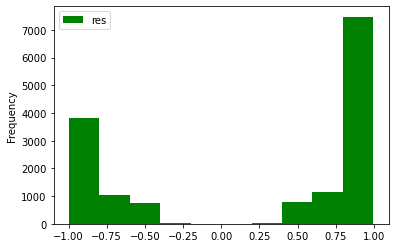

In [492]:
# 'res' distirbution.
sa_vs_arg.plot(y='res', kind='hist', color='green')

TypeError: colormaps() takes 0 positional arguments but 1 was given

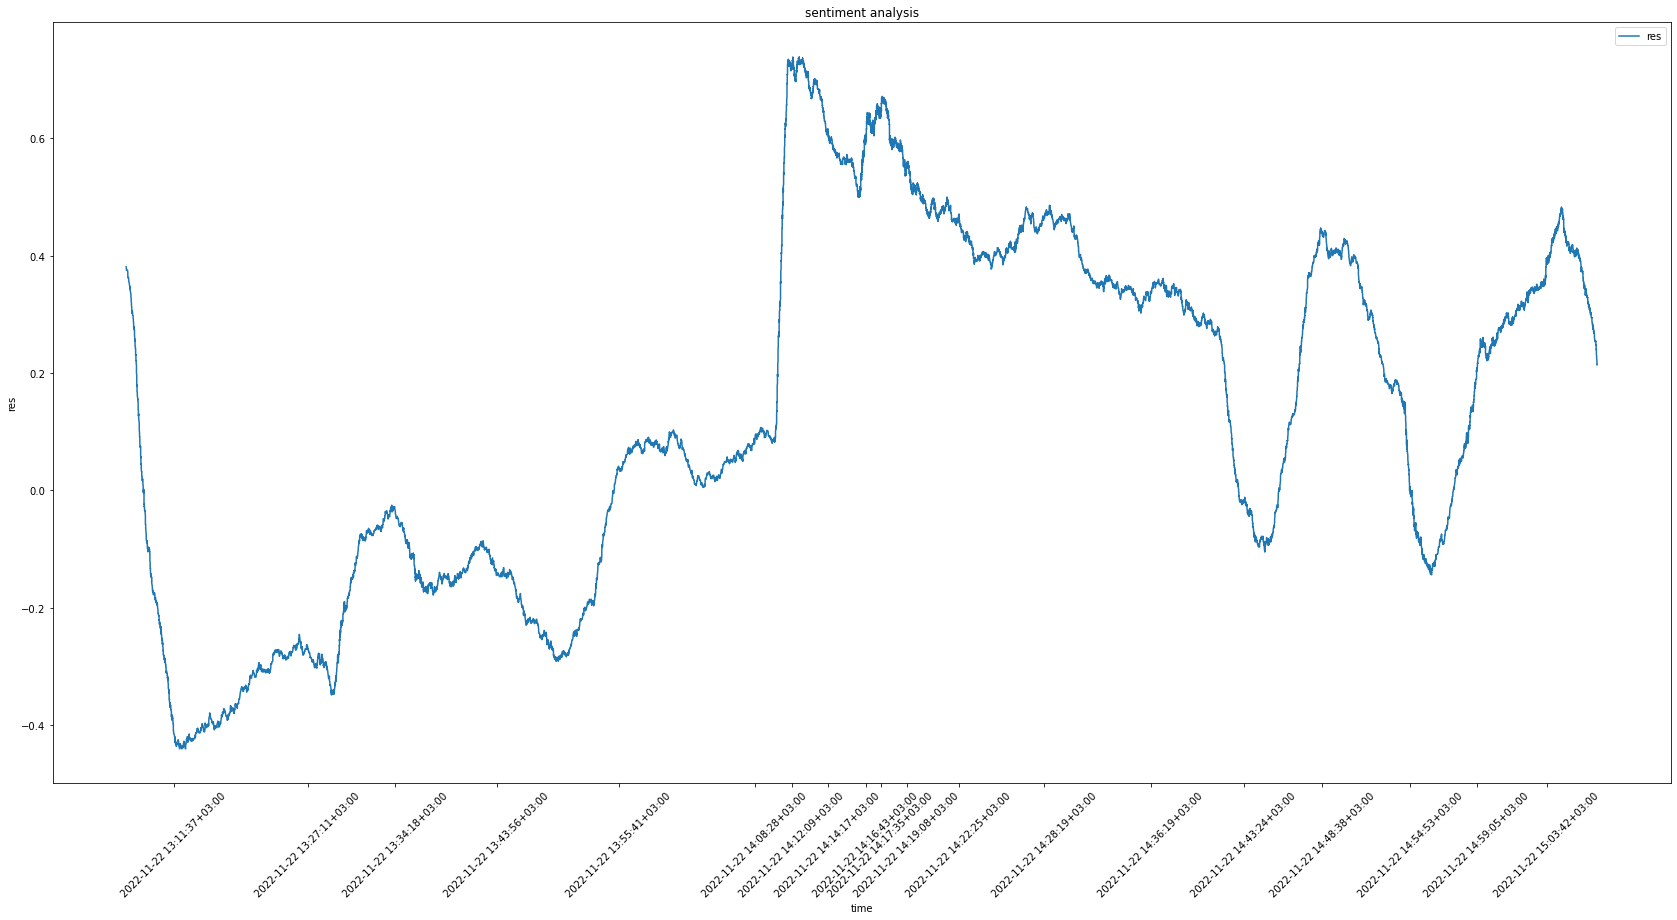

In [563]:
plt.figure(figsize=(29,14))
plt.plot(sa_vs_arg.index, sa_vs_arg['res'].rolling(500).mean(), label="res")
plt.title("sentiment analysis")
plt.xlabel("time")
plt.ylabel("res")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(sa_vs_arg.index[1000::750])


plt.show()

In [3]:
copy = sa_vs_arg[['Tweet_time', 'res']].set_index('Tweet_time').copy()

In [50]:
def timestamp_to_match(copy):
    copy.index = copy.index.astype(str)
    first_45 = np.where((copy.index > '2022-11-22 13:00:00') & (copy.index <= '2022-11-22 13:45:59'), copy.index.str[14:16], np.nan)
    first_ot = np.where((copy.index > '2022-11-22 13:45:59') & (copy.index <= '2022-11-22 13:52:59'), '45+' , np.nan)
    second_45 = np.where((copy.index >= '2022-11-22 14:09:00') & (copy.index <= '2022-11-22 14:54:59'), copy.index.str[14:16] , np.nan)
    second_ot = np.where((copy.index > '2022-11-22 14:54:59') & (copy.index <= '2022-11-22 15:07:04'), '90+' , np.nan)
    time_agg = pd.DataFrame(data ={'first_45': first_45, 'first_ot': first_ot, 'second_45': second_45, 'second_ot': second_ot})
    time_agg['first_45'] = time_agg['first_45'].astype(str)
    time_agg['second_45'] = time_agg['second_45'].astype(str)
    first_45 = pd.Series(first_45)
    time_agg['first_45'] = pd.Series(first_45[:744].astype(str).str[1:2].append(first_45[744:]))
    time_agg['second_45'] = time_agg.second_45.replace('nan', '0')
    time_agg['second_45'] = time_agg['second_45'].astype(int)
    
    compare = 9
    second_time = 54
    iter_ = 0
    for i in time_agg['second_45']:
        if not(i == 0):
            if(i == compare):
                i = second_time - i
            else:
                second_time+=2
                i = second_time - i
                compare+=1
            time_agg['second_45'].iloc[iter_] = i
        iter_+=1
    
    time_agg['second_45'] = time_agg['second_45'].astype(str)
    time_agg = time_agg.replace('nan', '')
    time_agg = time_agg.replace(np.nan, '')
    time_agg['second_45'] = time_agg['second_45'].replace('0', '')
    time_agg = time_agg[['first_45', 'first_ot', 'second_45', 'second_ot']].agg(''.join, axis=1)
    copy['match_time'] = np.array(time_agg)

    return copy

In [ ]:
copy = timestamp_to_match(copy)

In [12]:
copy.sample(10)

,res,match_time
Tweet_time,,
2022-11-22 15:03:54+03:00,0.994254,90+
2022-11-22 14:55:16+03:00,0.990564,90+
2022-11-22 13:58:45+03:00,-0.630434,
2022-11-22 13:09:12+03:00,-0.994022,9
2022-11-22 14:59:22+03:00,0.974931,90+
2022-11-22 14:16:55+03:00,0.788493,52
2022-11-22 14:18:17+03:00,0.483762,54
2022-11-22 14:41:46+03:00,-0.986562,77
2022-11-22 13:14:34+03:00,-0.692640,14


In [13]:
#Removing data that's not within the match time.
copy = copy[copy['match_time'] != '']

In [14]:
copy.match_time.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '45+', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '90+'], dtype=object)

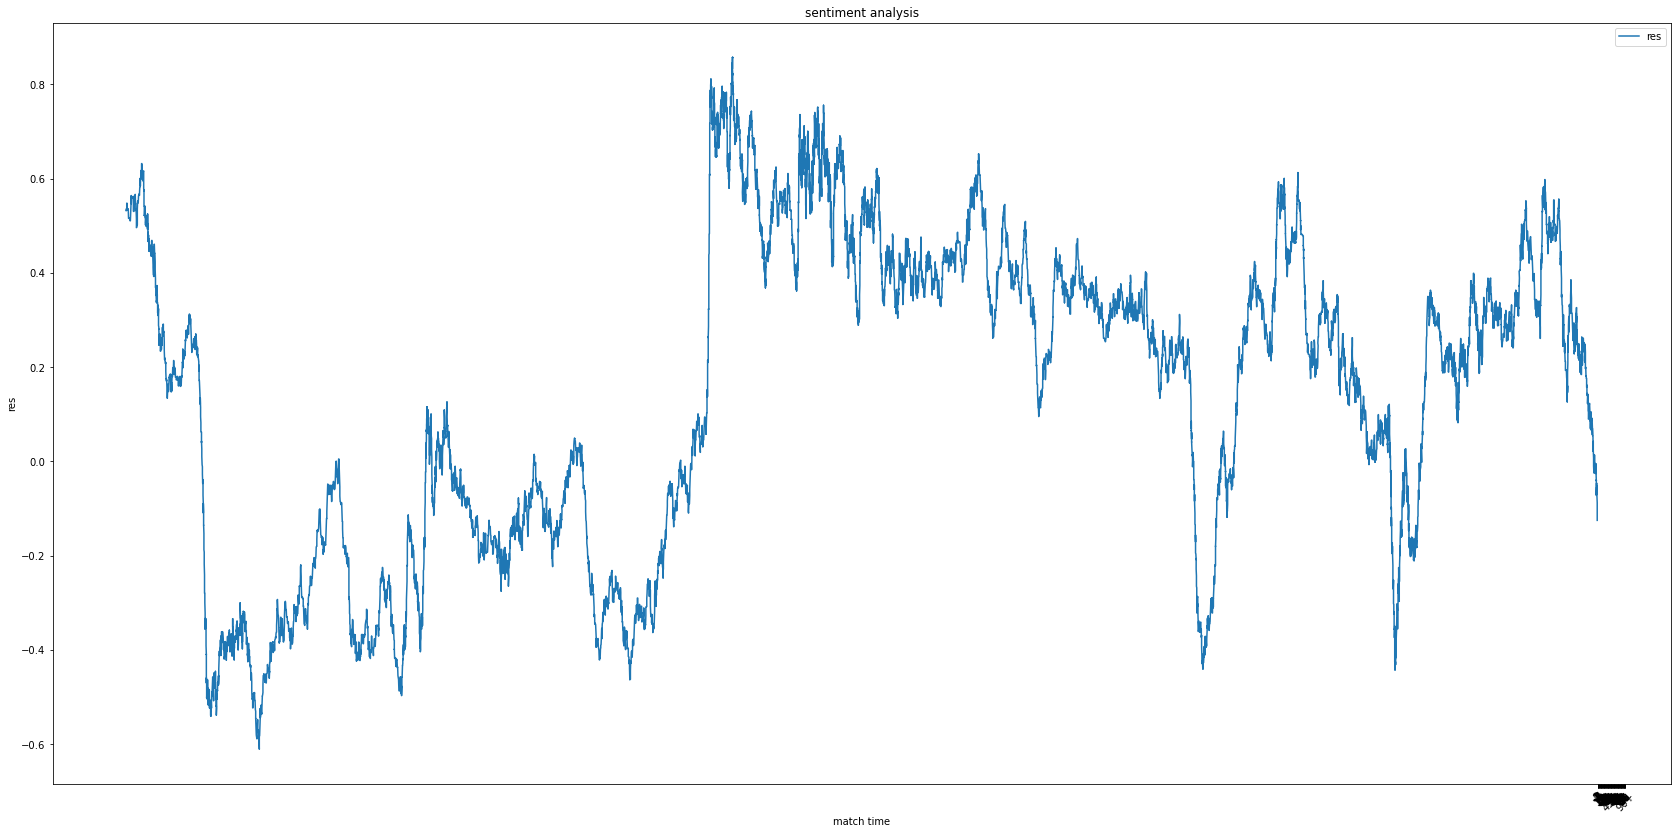

In [596]:
plt.figure(figsize=(29,14))
plt.plot(copy.index, copy['res'].rolling(100).mean(), label="res")
plt.title("sentiment analysis")
plt.xlabel("match time")
plt.ylabel("res")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(copy.match_time.unique())

plt.show()

In [680]:
'''ind = []
time = []
for i in copy.match_time.unique():
    ind.append(copy.match_time.eq(i).idxmax())
    time.append(i)'''

In [477]:
copy[copy.match_time.eq('10')]

,res,match_time
Tweet_time,,
2022-11-22 13:10:00+03:00,0.987968,10
2022-11-22 13:10:00+03:00,-0.995985,10
2022-11-22 13:10:00+03:00,-0.444536,10
2022-11-22 13:10:00+03:00,-0.993262,10
2022-11-22 13:10:01+03:00,0.911466,10
2022-11-22 13:10:01+03:00,-0.549335,10
2022-11-22 13:10:02+03:00,-0.980747,10
2022-11-22 13:10:02+03:00,-0.993047,10
2022-11-22 13:10:03+03:00,0.547615,10


Trying yo manually pick the best points for the x-axis


In [317]:
ind_x = [
    '2022-11-22 13:05:03+03:00',
    '2022-11-22 13:10:00+03:00',
    '2022-11-22 13:15:37+03:00',
    '2022-11-22 13:20:00+03:00',
    '2022-11-22 13:25:00+03:00',
    '2022-11-22 13:30:00+03:00',
    '2022-11-22 13:35:01+03:00',
    '2022-11-22 13:40:00+03:00',
    '2022-11-22 13:45:00+03:00',
    '2022-11-22 13:50:00+03:00',
    '2022-11-22 14:14:00+03:00',
    '2022-11-22 14:19:00+03:00',
    '2022-11-22 14:24:00+03:00',
    '2022-11-22 14:29:19+03:00',
    '2022-11-22 14:34:00+03:00',
    '2022-11-22 14:39:01+03:00',
    '2022-11-22 14:44:00+03:00',
    '2022-11-22 14:49:00+03:00',
    '2022-11-22 14:54:00+03:00',
    '2022-11-22 14:59:00+03:00',
    '2022-11-22 15:04:00+03:00',
    '2022-11-22 15:07:03+03:00'
]

In [318]:
time_x = [
    5,
    10,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    '45+',
    50,
    55,
    60,
    65,
    70,
    75,
    80,
    85,
    90,
    '90+',
    '90+',
    '90+'
    
]

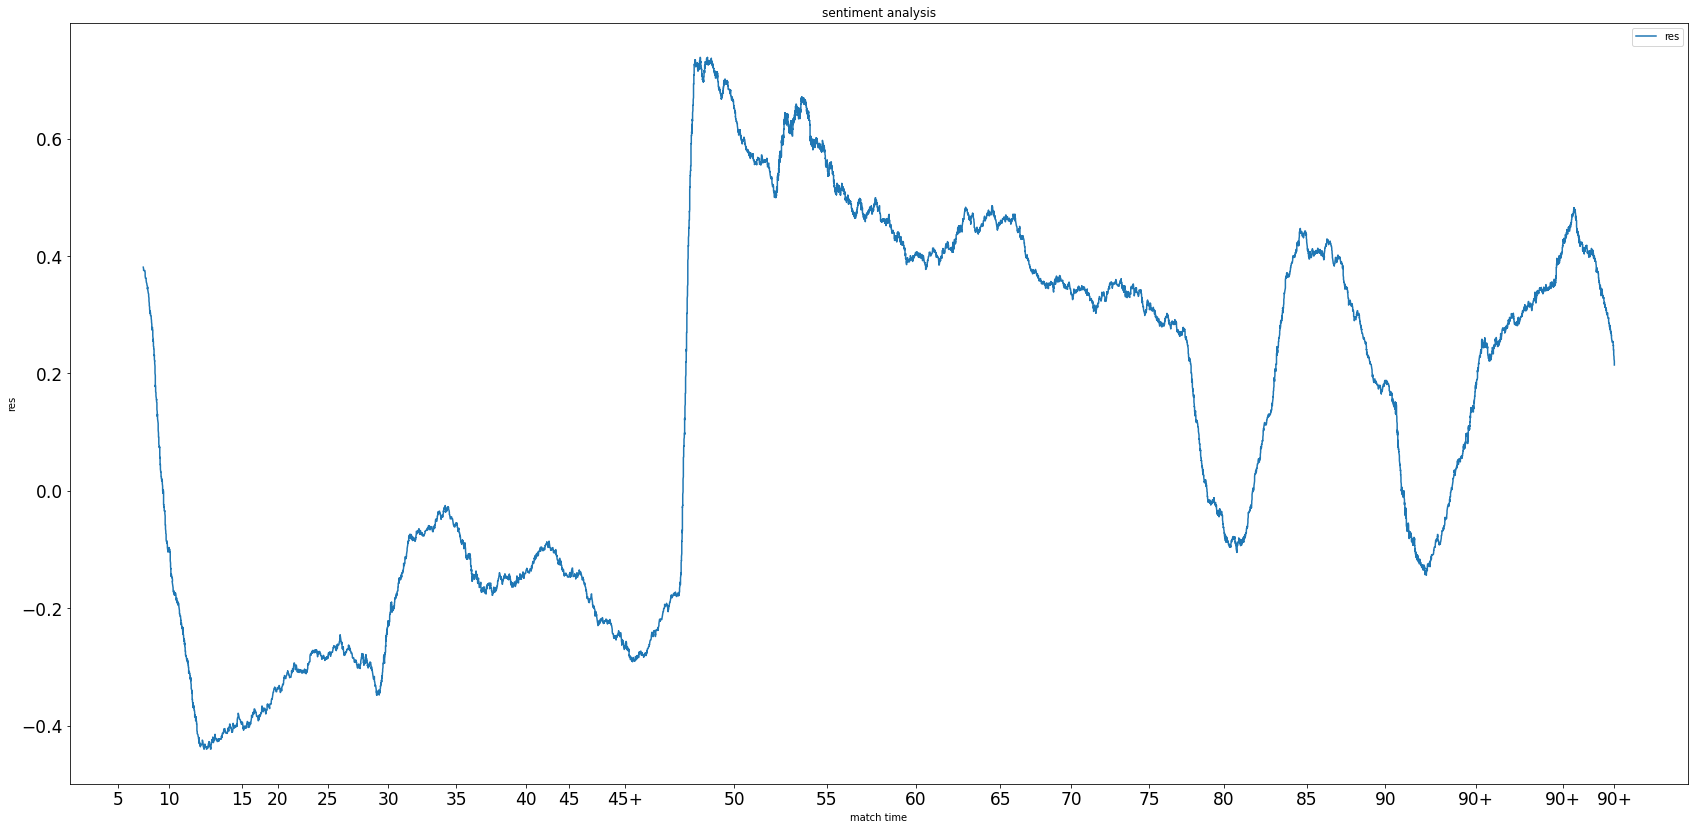

In [226]:
plt.figure(figsize=(29, 14))
plt.plot(copy.index, copy['res'].rolling(500).mean(), label="res")
plt.title("sentiment analysis")
plt.xlabel("match time")
plt.ylabel("res")
plt.legend()

plt.xticks(ind_x, time_x, fontsize=17)
plt.yticks(fontsize=17)
#plt.tight_layout()
#plt.xticks(copy.match_time.unique())

plt.show()

Since using the moving average help with the visualization but also shifts the starting data to the right, we should add more data at the beginning as a compensation.

In [ ]:
copy2 = copy.copy()

In [539]:
df1['Tweet_time'] = pd.to_datetime(df1['Tweet_time']).dt.tz_convert('Asia/Kuwait')
df1 = df1[['Tweet_time', 'res']].set_index('Tweet_time')
df1.head()

,res
Tweet_time,
2022-11-22 11:31:35+03:00,"[{'label': 'neutral', 'score': 0.7373687624931..."
2022-11-22 11:31:35+03:00,"[{'label': 'neutral', 'score': 0.6704737544059..."
2022-11-22 11:31:36+03:00,"[{'label': 'positive', 'score': 0.916225731372..."
2022-11-22 11:31:36+03:00,"[{'label': 'positive', 'score': 0.969212055206..."
2022-11-22 11:31:38+03:00,"[{'label': 'positive', 'score': 0.856728494167..."


In [540]:
#Fix res column
df1['res'] = df1['res'].apply(string_slicing)
#get the needed data (750 records before the match starts)
df1 = df1[df1.index < '2022-11-22 13:00:00+03:00'].tail(750)
df1.head()

,res
Tweet_time,
2022-11-22 12:47:26+03:00,0.990572
2022-11-22 12:47:26+03:00,-0.895745
2022-11-22 12:47:26+03:00,0.849662
2022-11-22 12:47:29+03:00,0.852447
2022-11-22 12:47:33+03:00,-0.898080


In [578]:
#add match time even if the match didnt starts, but just to match the original data structure.
df1['match_time'] = np.nan

In [581]:
copy2 = pd.concat([pd.DataFrame(df1), copy2])

>With manual x-ticking, we still need to scale the x-axis better, so, data reduction is required.


In [582]:
copy2['match_time'].value_counts().head(60)

90+    1911
47      271
55      269
53      268
48      266
45+     266
52      258
56      257
54      251
49      242
83      212
90      211
9       202
36      193
62      188
50      187
29      184
57      176
30      162
58      160
51      150
10      147
78      146
3       143
11      142
80      136
59      131
73      126
79      124
84      123
28      122
87      119
81      118
74      115
66      114
85      112
63      111
77      107
88      106
60      105
69      103
35      103
31      102
71       99
68       92
23       91
64       90
82       89
70       88
76       88
72       87
61       87
89       87
37       87
86       86
65       81
75       80
39       76
33       75
12       74
Name: match_time, dtype: int64

In [452]:
removal_df = copy2[copy2['match_time'].str.contains('54', na=False)].sample(30)
copy2 = pd.concat([copy2, removal_df, removal_df]).drop_duplicates(keep=False)

Replot after data reduction.

In [92]:
ind_xx = [
    '2022-11-22 13:01:00+03:00',#0
    '2022-11-22 13:10:00+03:00',#10
    '2022-11-22 13:20:00+03:00',#20
    '2022-11-22 13:30:00+03:00',#30
    '2022-11-22 13:40:00+03:00',#40
    '2022-11-22 13:50:02+03:00',#45+
    '2022-11-22 14:14:00+03:00',#50
    '2022-11-22 14:24:00+03:00',#60
    '2022-11-22 14:34:00+03:00',#70
    '2022-11-22 14:44:00+03:00',#80
    '2022-11-22 14:54:00+03:00',#90
    '2022-11-22 15:04:00+03:00',
]

In [93]:
time_xx = [
    "00'",
    "10'",
    "20'",
    "30'",
    "40'",
    "45+5'",
    "50'",
    "60'",
    "70'",
    "80'",
    "90'",
    "90+10'"

    
]

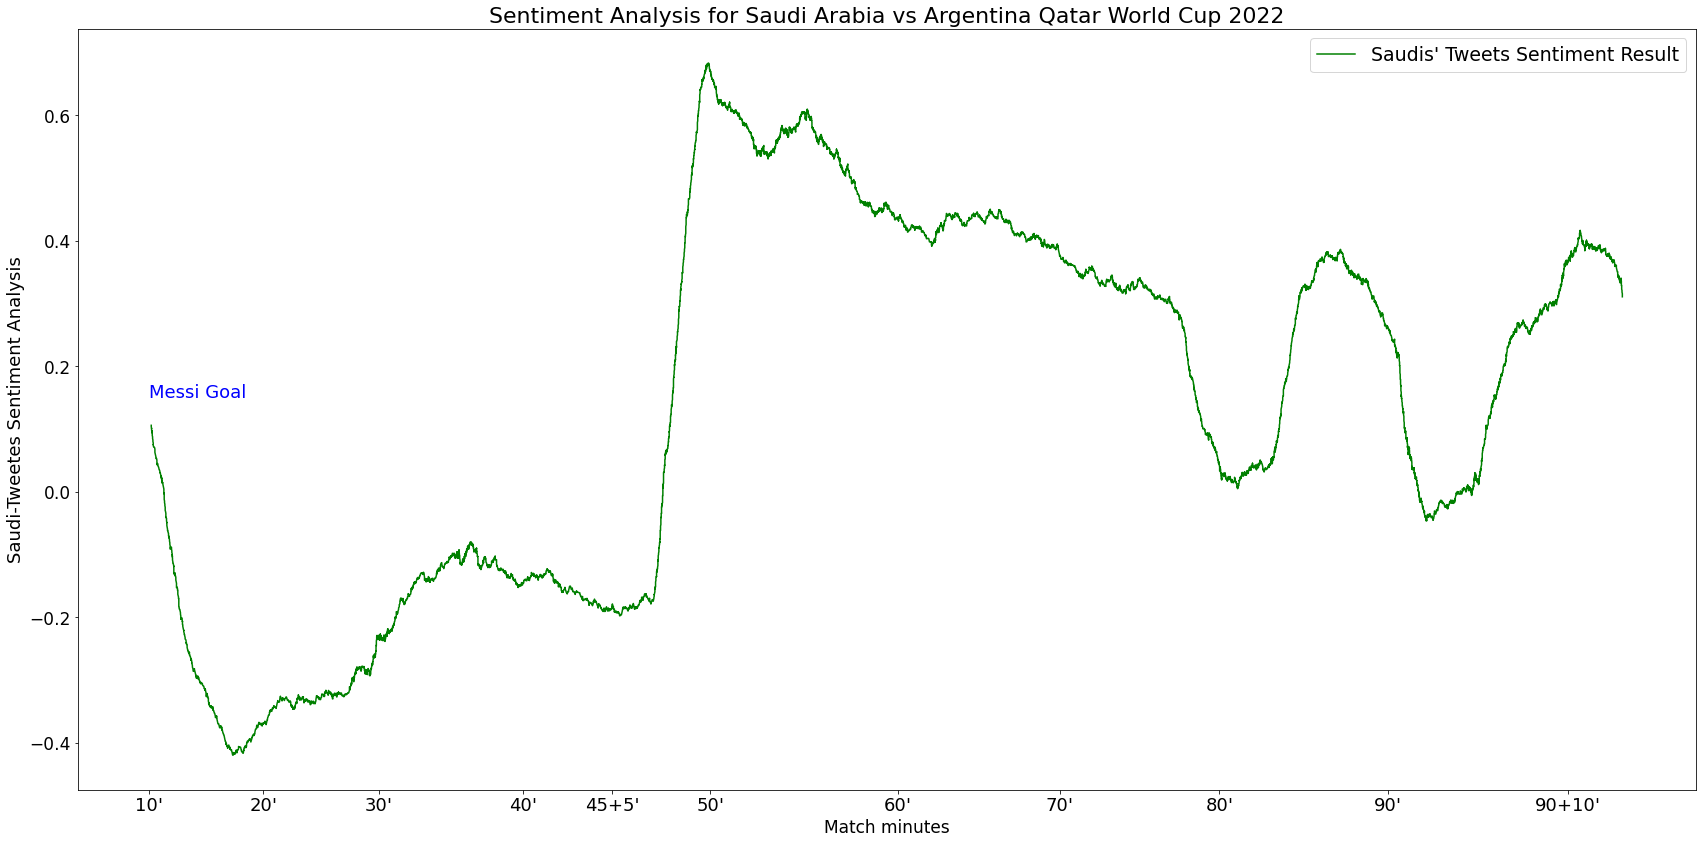

In [482]:
#Replot after data reduction.
plt.figure(figsize=(29, 14))
plt.plot(copy2.index, copy2['res'].rolling(750).mean(), label="Saudis' Tweets Sentiment Result", color = 'green')
plt.title("Sentiment Analysis for Saudi Arabia vs Argentina Qatar World Cup 2022", fontsize=22)
plt.xlabel("Match minutes", fontsize=17)
plt.ylabel("Saudi-Tweetes Sentiment Analysis", fontsize=18)
plt.xticks(ind_xx, time_xx, fontsize=18)
plt.yticks(fontsize=17)
plt.legend( loc='best', fontsize=19)
plt.text('2022-11-22 13:10:00+03:00', 0.15, 'Messi Goal', fontsize = 18, color='blue')

plt.show()

In [76]:
logo = plt.imread(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\football_logo.PNG")

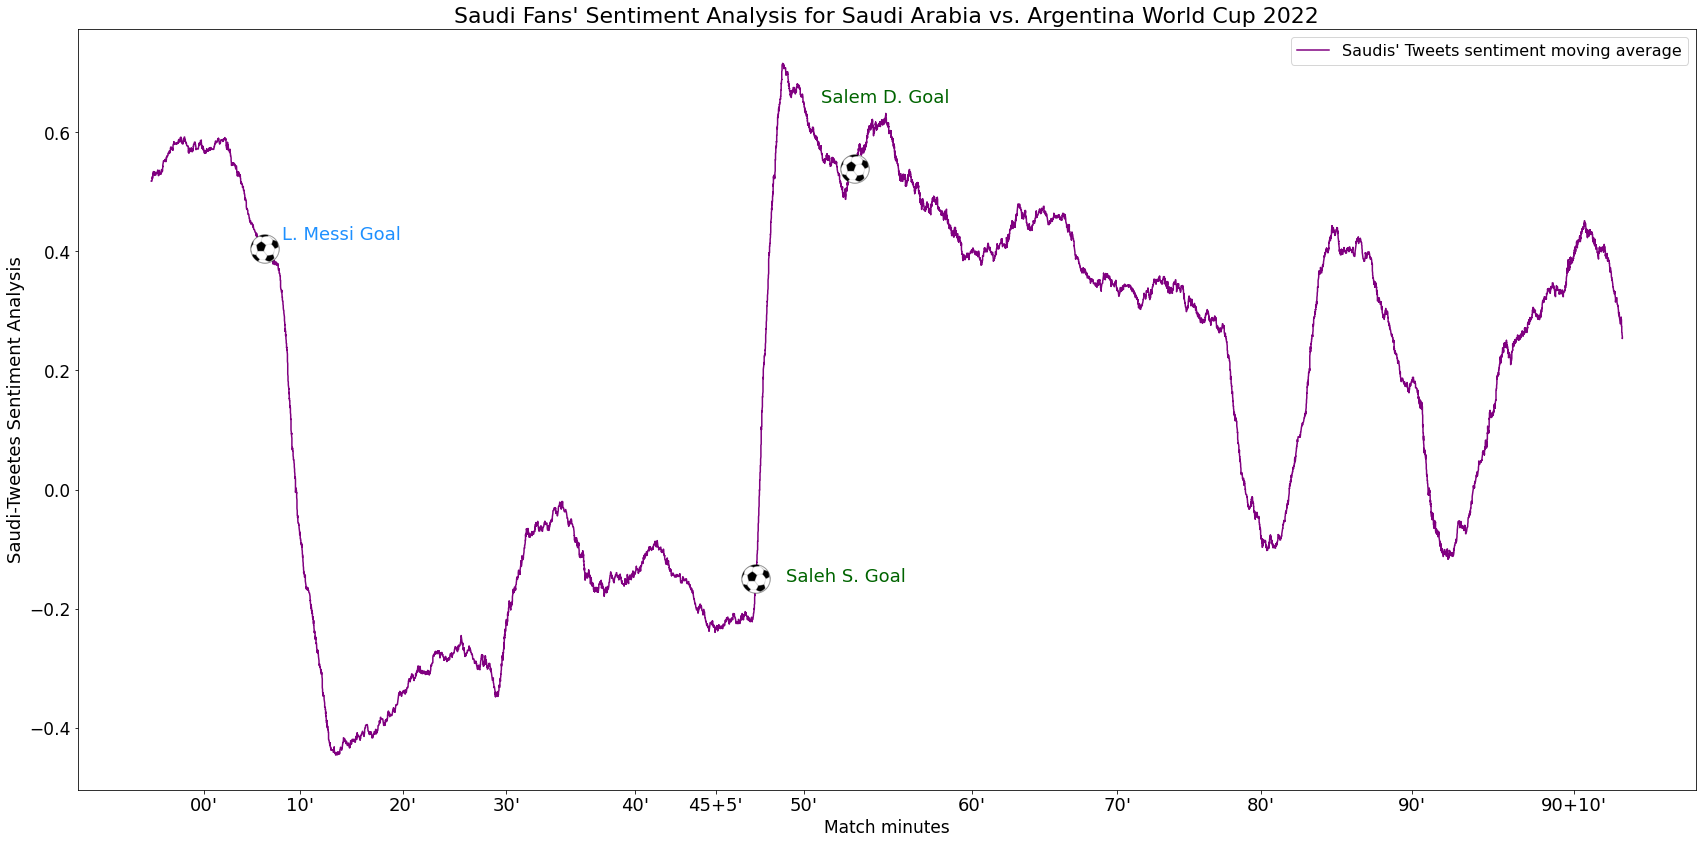

In [737]:
#Replot after adding moving avergae data and reducing data inconsistency
fig = plt.figure(figsize=(29, 14))
plt.plot(copy2.index, copy2['res'].rolling(500).mean(), label="Saudis' Tweets sentiment moving average", color = 'purple')
plt.title("Saudi Fans' Sentiment Analysis for Saudi Arabia vs. Argentina World Cup 2022", fontsize=22)
plt.xlabel("Match minutes", fontsize=17)
plt.ylabel("Saudi-Tweetes Sentiment Analysis", fontsize=18)
plt.xticks(ind_xx, time_xx, fontsize=18)
plt.yticks(fontsize=17)
plt.legend(loc='best', fontsize=16)
plt.text('2022-11-22 13:09:00+03:00', 0.42, 'L. Messi Goal', fontsize = 18, color='dodgerblue')
fig.figimage(logo, 250, 580)
plt.text('2022-11-22 14:13:00+03:00', -0.155, 'Saleh S. Goal', fontsize = 18, color='darkgreen')
fig.figimage(logo, 741, 250)
plt.text('2022-11-22 14:15:00+03:00', 0.65, 'Salem D. Goal', fontsize = 18, color='darkgreen')
fig.figimage(logo, 840, 660)
#plt.savefig(r"C:\Users\Moaya\Desktop\Projects\World Cup Sentiment Analysis\sa_ag_plot.png", bbox_inches='tight')

plt.show()

### 5.2- Visualization by grouping match minutes
##### Second visuilazation will be using the actual data (grouped by match minutes) and the moving average of 5 match minutes.


In [111]:
minutes_group =  pd.DataFrame(copy2.groupby('match_time')['res'].mean())
minutes_group.head()

,res
match_time,
0,0.518299
1,0.646783
10,-0.423914
11,-0.420621
12,-0.445750


In [115]:
list_ = []
for i in range(91):
    list_.append(i)
list_[90]
list_.insert(46, '45+')
list_.insert(92, '90+')
list_ = [str(i) for i in list_]

In [195]:
#minutes_group = minutes_group.reindex(list_)
#minutes_group = minutes_group[~minutes_group.index.str.contains('45\+|90\+', na=False)]
minutes_group.index = minutes_group.index + "'"

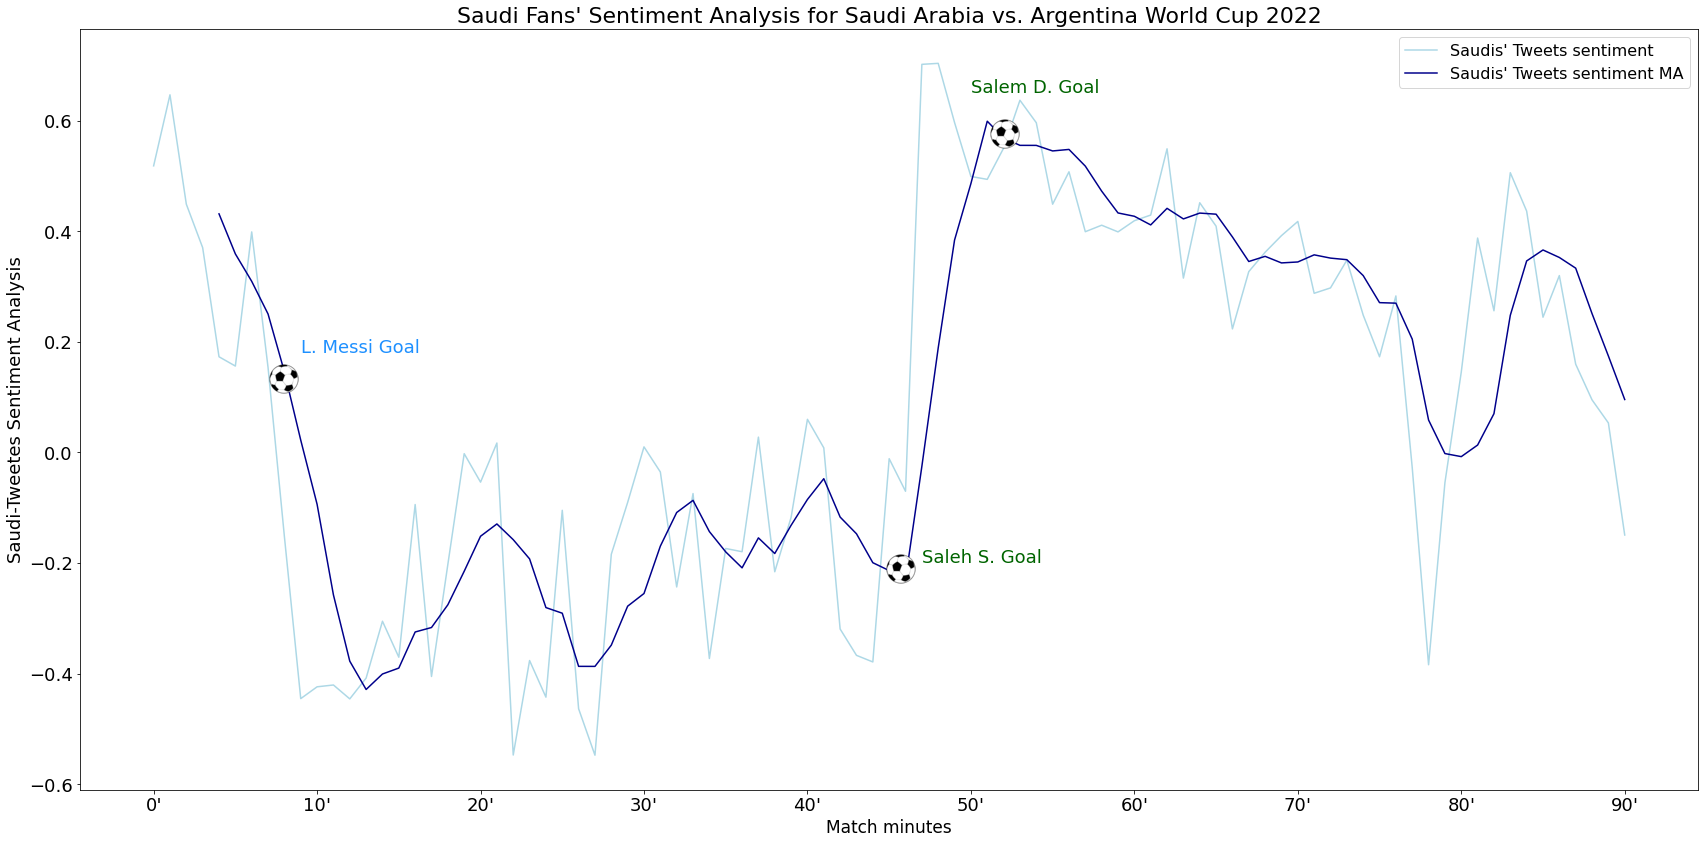

In [201]:
#Reploting again
fig = plt.figure(figsize=(29, 14))
plt.plot(minutes_group.index, minutes_group['res'], label="Saudis' Tweets sentiment", color = 'lightblue')
plt.plot(minutes_group.index, minutes_group['res'].rolling(5).mean(), label="Saudis' Tweets sentiment MA", color = 'darkblue')
plt.legend(loc='best', fontsize=16)
plt.title("Saudi Fans' Sentiment Analysis for Saudi Arabia vs. Argentina World Cup 2022", fontsize=22)
plt.xlabel("Match minutes", fontsize=17)
plt.ylabel("Saudi-Tweetes Sentiment Analysis", fontsize=18)
plt.xticks(minutes_group.index[::10], fontsize=18)
plt.yticks(fontsize=18)
plt.text("9'", 0.18, 'L. Messi Goal', fontsize = 18, color='dodgerblue')
fig.figimage(logo, 269, 450)
plt.text("47'", -0.20, 'Saleh S. Goal', fontsize = 18, color='darkgreen')
fig.figimage(logo, 886, 260)
plt.text("50'", 0.65, 'Salem D. Goal', fontsize = 18, color='darkgreen')
fig.figimage(logo, 990, 695)

plt.show;

### 5.3- Visualization by grouping data by 30 seconds
##### Since the last visualization seems a bit dry we will try to increase the data in the plot by taking each 30 seconds.


In [12]:
#copy2.index = pd.to_datetime(copy2.index)

In [67]:
#Average distance between records.
copy2.index.to_series().diff().dt.seconds.div(60, fill_value=0).mean()

6.396358909388526

In [117]:
#Group each ten seconds.
thirty_secs = copy2.resample('30S').mean()
thirty_secs

,res
Tweet_time,
2022-11-22 12:47:00+03:00,0.449234
2022-11-22 12:47:30+03:00,0.169173
2022-11-22 12:48:00+03:00,0.514949
2022-11-22 12:48:30+03:00,0.424239
2022-11-22 12:49:00+03:00,0.372003
...,...
2022-11-22 15:05:00+03:00,0.237402
2022-11-22 15:05:30+03:00,0.222064
2022-11-22 15:06:00+03:00,0.104600


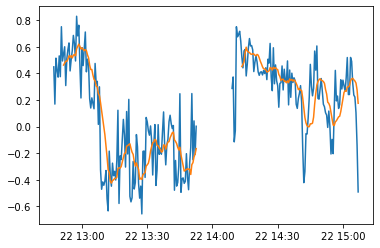

In [118]:
plt.plot(thirty_secs.index, thirty_secs)
plt.plot(thirty_secs.rolling(10).mean().index, thirty_secs.rolling(10).mean())

> No need to enhance the plot since the 30 seconds choice clearly not the best choice. The data still very variate and not clear.

## 6- Word cloud visualizations

In [109]:
#Merge Tweet with the current dataframe to build wordcloud.
m1 = copy2.reset_index()
m2 = sa_vs_arg.copy()
m2['Tweet_time'] = m2['Tweet_time'].astype(str)

In [123]:
word_df = pd.merge(m1, m2, on = ['Tweet_time', 'res'], how = 'inner')
word_df

,Tweet_time,res,match_time,Userame,Tweet
0,2022-11-22 13:00:01+03:00,0.955334,0,@sho302017,ههههههههههههههه الله ياجعل الارجنتين تفوز ٨٠ /...
1,2022-11-22 13:00:03+03:00,0.869542,0,@masiri83a,@al_baste اللهم آمين
2,2022-11-22 13:00:03+03:00,0.986205,0,@musa__8,@j_b1x حلو شدي حيلك وان شاء الله فل مارك وانجو...
3,2022-11-22 13:00:05+03:00,-0.723884,0,@hmx_10,سلمان يمون على ميسي
4,2022-11-22 13:00:06+03:00,0.967613,0,@Leenalkrida,الحمدلله الذيّ نظُن به خيراً فيُكرمنا بأفضل مِ...
...,...,...,...,...,...
8205,2022-11-22 15:07:01+03:00,-0.680651,90+,@realsaher_,صفر يازففتتتت #السعوديه_الارجنتين
8206,2022-11-22 15:07:01+03:00,-0.567384,90+,@M7uu_,صفرررررر يخوي
8207,2022-11-22 15:07:01+03:00,-0.996529,90+,@iiyupl,ابكيكك ياضفعه يا سكالوني
8208,2022-11-22 15:07:03+03:00,-0.863289,90+,@Am_76r,ييييلعن دددييييينك يبن اللللللززززناااااااا ال...


In [142]:
def arabic_wordcloud(df_col, words_counts):
    text = " ".join(line for line in df_col)
    stop_ar = stopwords.words('arabic')
    
    def removeWeirdChars(text):
        weirdPatterns = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u'\U00010000-\U0010ffff'
                                   u"\u200d"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\u3030"
                                   u"\ufe0f"
                                   u"\u2069"
                                   u"\u2066"
                                   u"\u200c"
                                   u"\u2068"
                                   u"\u2067"
                                   "]+", flags=re.UNICODE)
        return weirdPatterns.sub(r'', text)
    
    removeWeirdChars(text)
    top_words = {}
    words = text.split()

    for w in words:
        if w in stop_ar:
            continue
        else:
            if w not in top_words:
                top_words[w] = 1
            else:
                top_words[w] +=1

    top_words = {k: v for k, v in sorted(top_words.items(), key=lambda item: item[1], reverse = True)}
    
    def take(n, iterable):
        "Return first n items of the iterable as a list"
        return list(islice(iterable, n))
    for_wc = take(words_counts, top_words.items())
    dic_data = {}

    for t in for_wc:
        r = arabic_reshaper.reshape(t[0]) # connect Arabic letters
        bdt = get_display(r) # right to left
        dic_data[bdt] = t[1]

    #Print cloud word for tweets (before cleaning)
    wc = WordCloud(background_color="white", width=1600, height=800, max_words=400
                   ,font_path='Shoroq-Font.ttf').generate_from_frequencies(dic_data)
    return wc

In [10]:
messi_goal_wc = word_df[(word_df['match_time'] == '10') | (word_df['match_time'] == '11') | (word_df['match_time'] == '12') | (word_df['match_time'] == '13')]
messi_goal_wc

,Tweet_time,res,match_time,Userame,Tweet
495,2022-11-22 13:10:00+03:00,-0.995985,10,@AsimRT8,يا حكم يا مرتشي يا ابن الكلب احنا ناقصين
496,2022-11-22 13:10:00+03:00,-0.444536,10,@faikalid,لا لا …
497,2022-11-22 13:10:00+03:00,-0.993262,10,@jamal_RMA,يلعن اهلك حكم
498,2022-11-22 13:10:01+03:00,-0.549335,10,@sQEc_,مصخره 😂😂😂
499,2022-11-22 13:10:03+03:00,0.547615,10,@amal2304,خير ؟
...,...,...,...,...,...
797,2022-11-22 13:13:53+03:00,-0.501573,13,@nuhaibrahimq,خلتني اواجه الحياه مو بس الباطنة 💗 https://t.c...
798,2022-11-22 13:13:57+03:00,-0.500824,13,@Z__jdn,يالله انك تسترنا بالله
799,2022-11-22 13:13:57+03:00,0.664436,13,@iMshmhd,@ali__O18 يا قدم الكلمة 😂
800,2022-11-22 13:13:58+03:00,-0.708530,13,@A9eel7788,سعود تحسب نفسك في الهلال دي عندنا في الدوري م ...


### 6.1- Messi goal word cloud

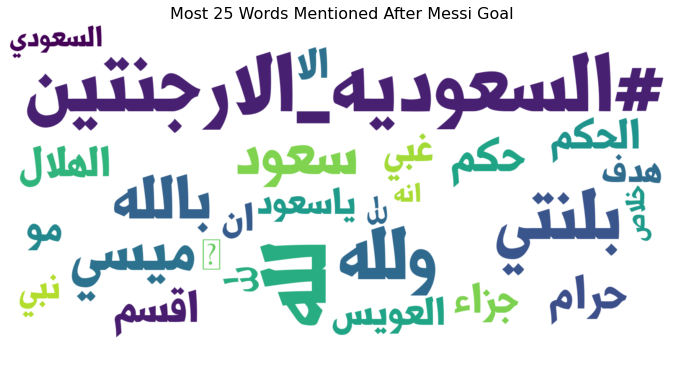

In [47]:
#Word cloud for Messi goal.
wc = arabic_wordcloud(messi_goal_wc.Tweet, 25)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most 25 Words Mentioned After Messi Goal', fontsize=16)
plt.show()

### 6.2- Saleh S. goal word cloud

In [18]:
saleh_goal_wc = word_df[(word_df['match_time'] == '47') | (word_df['match_time'] == '48') | (word_df['match_time'] == '49') | (word_df['match_time'] == '50')]
saleh_goal_wc

,Tweet_time,res,match_time,Userame,Tweet
2548,2022-11-22 14:11:06+03:00,-0.981891,47,@Aseeralteep,@abookhater الكاميرات المتحركة ليست للنظام وإن...
2549,2022-11-22 14:11:07+03:00,0.918332,47,@aljurayan_,الصلللللحححححييييييي
2550,2022-11-22 14:11:08+03:00,0.951849,47,@jiiill_,قورووروووولللللللللللللل
2551,2022-11-22 14:11:08+03:00,-0.444124,47,@A_Almofdda,الاووووووووول
2552,2022-11-22 14:11:08+03:00,-0.533340,47,@wayll_,اييييييييييي
...,...,...,...,...,...
3192,2022-11-22 14:14:57+03:00,0.874038,50,@ALDAWOOD212,خلاص طفيت المباراة ، مهما كانت النتيجة اعد الس...
3193,2022-11-22 14:14:58+03:00,0.992307,50,@Meshaal_Saeed,#السعوديه_الارجنتين \nالحمد لله يارب تكمل 🇸🇦💚
3194,2022-11-22 14:14:58+03:00,0.980683,50,@SLT62,يالله يالله الفرحة https://t.co/uoHVp3GCud
3195,2022-11-22 14:14:59+03:00,0.606359,50,@Waleednf9,انا احلم؟


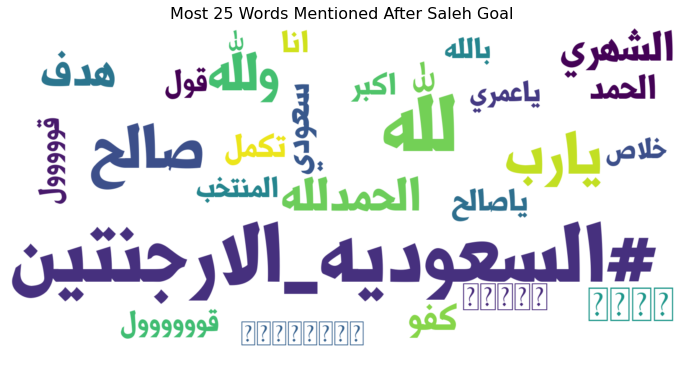

In [61]:
#Word cloud for Saleh goal.
wc = arabic_wordcloud(saleh_goal_wc.Tweet, 25)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most 25 Words Mentioned After Saleh Goal', fontsize=16)
plt.show()

### 6.3- Salem D. goal word cloud

In [32]:
salem_goal_wc = word_df[(word_df['match_time'] == '52') | (word_df['match_time'] == '53') | (word_df['match_time'] == '54') | (word_df['match_time'] == '55')]
salem_goal_wc

,Tweet_time,res,match_time,Userame,Tweet
3279,2022-11-22 14:16:02+03:00,0.969696,52,@Afisal2030,جووووووووووول\n#السعوديه_الارجنتين ✌️
3280,2022-11-22 14:16:03+03:00,-0.605587,52,@Rehamsa89,@Queen22latifa @U3kyb @Ad5ompY @3zoozvic تذكرت...
3281,2022-11-22 14:16:06+03:00,0.508386,52,@x1amjad,الثانينيييي🇸🇦🇸🇦🇸🇦🇸🇦🇸🇦🇸🇦🇸🇦🇸🇦🇸🇦😭😭😭😭😭😭😭😭
3282,2022-11-22 14:16:06+03:00,-0.957907,52,@om_basil1,@rodinah_ @Sohailah_h ههههههههههههه اتوقع كدا ...
3283,2022-11-22 14:16:09+03:00,-0.565830,52,@Ewqu_,@ex_iiifd لا عمرك تحلل
...,...,...,...,...,...
3995,2022-11-22 14:19:58+03:00,0.615413,55,@safwanoz,مش ممكن 😍😍🔥🔥🔥
3996,2022-11-22 14:19:58+03:00,0.927541,55,@Dr_Alaa_Ismail,المعجزه بتحصل مااااشااااءالله 🇸🇦🇸🇦🇸🇦🇸🇦 https:/...
3997,2022-11-22 14:19:59+03:00,0.755014,55,@Moudi_200,صراخ بيت الجيران اسمعه مو طبيعي الحماس اللي جا...
3998,2022-11-22 14:19:59+03:00,0.994011,55,@Talhandi,كفووووو يا رجاااال #السعوديه_الارجنتين


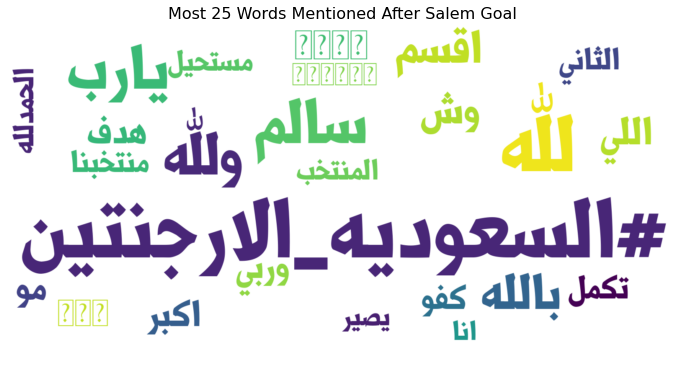

In [67]:
#Word cloud for Salem goal.
wc = arabic_wordcloud(salem_goal_wc.Tweet, 25)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most 25 Words Mentioned After Salem Goal', fontsize = 16)
plt.show()

# 7- Conclusion
> We tried plotting a different intervals, with or without moving averages, and the best line plot was by plotting all the data after applying moving average of 500 data points. Grouping each match minute also could be acceptable but comparing these two plots makes the minute-grouped looks dry. Even tho plotting moving average alone might not be the best idea since we need to see the actual data behaviour, in our case it was almost impossible to do that due to the data sentiment analysis results high diversity.
<br>
> We can see that in minute 10' Saudi fans were very disspointed with a negative peak of approximitly -0.45 and the max peak for saudi fans was at miute 47' with strong positive value of 0.7.
<br>
<br>
> The word clouds part helped us know exactly what Saudi fans are saying in during each goal, we can notice more positive words in Saleh and Salem goals while negative words showed after Messi goal.